# Assignment : Advanced Regression

In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data importing and understanding

In [3]:
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Some columns with 40-45% or more null values are to be analyzed and null values to be imputed or removed

In [6]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

In [7]:
#Dropping ID column, as it is of no use to our prediction
housing.drop('Id',axis=1,inplace=True)

In [8]:
#Percentage of null values in each column
null_percentage = 100*round(housing.isnull().sum()/housing.shape[0],4)

In [9]:
null_percentage[null_percentage>0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

As Explained in the data dictionary, NA for BsmtQual, GarageType, etc. means no basement and no garage respectively.
So will we treat these rows as a seperate category in categorical columns.

In [10]:
housing.BsmtQual.fillna('NA',inplace=True)
housing.BsmtCond.fillna('NA',inplace=True)
housing.BsmtExposure.fillna('NA',inplace=True)
housing.BsmtFinType1.fillna('NA',inplace=True)
housing.BsmtFinType2.fillna('NA',inplace=True)
housing.GarageType.fillna('NA',inplace=True)
housing.GarageFinish.fillna('NA',inplace=True)
housing.GarageQual.fillna('NA',inplace=True)
housing.GarageCond.fillna('NA',inplace=True)
housing.Alley.fillna('NA',inplace=True)
housing.FireplaceQu.fillna('NA',inplace=True)
housing.PoolQC.fillna('NA',inplace=True)
housing.Fence.fillna('NA',inplace=True)
housing.MiscFeature.fillna('NA',inplace=True)

In [11]:
housing.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [12]:
#We see that missing values are from same rows for MasVnrType and MasVnrArea.
#Also we look at the sales price range of these rows
housing[housing.MasVnrType.isnull()][['MasVnrArea','SalePrice']]

,MasVnrArea,SalePrice
234,NaN,216500
529,NaN,200624
650,NaN,205950
936,NaN,184900
973,NaN,182000
977,NaN,199900
1243,NaN,465000
1278,NaN,237000


In [13]:
#Distribution of target variable values w.r.t MasVnrType before imputaion of missing values
housing.groupby('MasVnrType')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
MasVnrType,,,,,,,,
BrkCmn,15.0,146318.066667,46187.583632,89471.0,114250.0,139000.0,163950.0,277000.0
BrkFace,445.0,204691.871910,81214.293554,75000.0,149300.0,181000.0,236000.0,755000.0
None,864.0,156221.891204,60708.262798,34900.0,118991.0,143000.0,181875.0,745000.0
Stone,128.0,265583.625000,99940.156577,119000.0,194650.0,246839.0,312779.0,611657.0


In [14]:
#More than 75% of None MasVnrType has 0 as MasVnrArea, missing values will be imputed accordingly
housing.groupby('MasVnrType')['MasVnrArea'].describe()

,count,mean,std,min,25%,50%,75%,max
MasVnrType,,,,,,,,
BrkCmn,15.0,247.666667,182.423239,41.0,91.5,192.0,381.50,621.0
BrkFace,445.0,259.008989,215.137888,0.0,114.0,202.0,336.00,1600.0
None,864.0,1.094907,18.569659,0.0,0.0,0.0,0.00,344.0
Stone,128.0,239.304688,172.129257,0.0,111.5,206.5,296.25,860.0


In [15]:
#Imputing missing values in the column MasVnrType with Mode 'None'
housing.MasVnrType.fillna('None',inplace=True)
housing.MasVnrArea.fillna(0,inplace=True)

In [16]:
#Checking the impact of imputation on Target Variable -- very less
housing.groupby('MasVnrType')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
MasVnrType,,,,,,,,
BrkCmn,15.0,146318.066667,46187.583632,89471.0,114250.0,139000.0,163950.0,277000.0
BrkFace,445.0,204691.871910,81214.293554,75000.0,149300.0,181000.0,236000.0,755000.0
None,872.0,156958.243119,61491.688969,34900.0,119000.0,143125.0,184025.0,745000.0
Stone,128.0,265583.625000,99940.156577,119000.0,194650.0,246839.0,312779.0,611657.0


In [17]:
#Checking the impact of imputation on MasVnrArea -- very less
housing.groupby('MasVnrType')['MasVnrArea'].describe()

,count,mean,std,min,25%,50%,75%,max
MasVnrType,,,,,,,,
BrkCmn,15.0,247.666667,182.423239,41.0,91.5,192.0,381.50,621.0
BrkFace,445.0,259.008989,215.137888,0.0,114.0,202.0,336.00,1600.0
None,872.0,1.084862,18.484478,0.0,0.0,0.0,0.00,344.0
Stone,128.0,239.304688,172.129257,0.0,111.5,206.5,296.25,860.0


In [18]:
housing.Electrical.isnull().sum()

1

In [19]:
#Since there is only single missing value for Electrical column we will impute it with mode -- SBrkr
housing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [20]:
housing.Electrical.fillna('SBrkr',inplace=True)

In [21]:
null_percentage = 100*round(housing.isnull().sum()/housing.shape[0],4)
null_percentage[null_percentage>0]

LotFrontage    17.74
GarageYrBlt     5.55
dtype: float64

We cannot straight away drop LotFrontage because it could be of high importance in prediction. We also cannot remove 18% rows from our data.

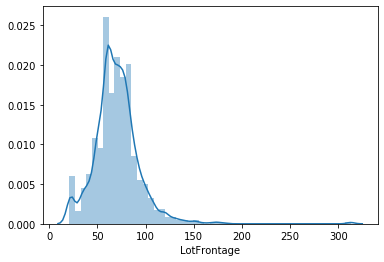

In [22]:
sns.distplot(housing.LotFrontage)

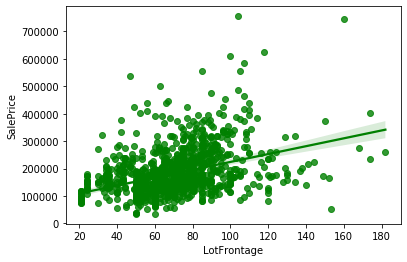

In [23]:
#LotFrontage has some linear correlation with target variable, imputations will effect predictions 
#so cannot impute just with mean/median
sns.regplot(housing[housing.LotFrontage<200].LotFrontage, housing[housing.LotFrontage<200].SalePrice, color='g')

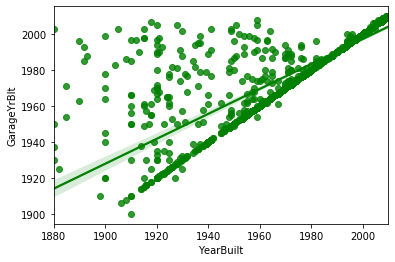

In [24]:
#YearBuilt and GarageYrBlt seems to have equal values for most and linearly correlated for others, hence can be imputed too
sns.regplot(housing.YearBuilt, housing.GarageYrBlt, color='g')

If we impute LotFrontage with mean or median than it may effect our predictions since LotFrontage seems to have correlation with target variable. <br> Instead LotFrontage can be predicted based on other variables. 
<br>Same is the case with GarageYrBlt, it is highly correlated with YearBuilt.

Therefore we will impute the rest of the missing values with <b>IterativeImputer</b> after dummyfication and some data preparation steps

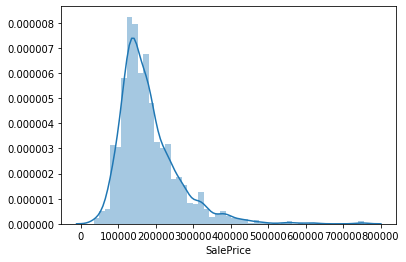

In [25]:
#Checking distribution pattern of SalePrice and if there are outliers
sns.distplot(housing.SalePrice)

In [26]:
#Applying log-transformation for normal distribution of target variable
housing.SalePrice = np.log(housing.SalePrice)

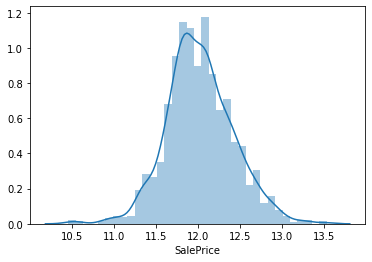

In [27]:
#Now the variable shows normal distribution
sns.distplot(housing.SalePrice)

## Data Preparation

In [28]:
#Deriving new features
housing.YearBuilt = 2020-housing.YearBuilt
housing.YearRemodAdd = 2020 - housing.YearRemodAdd
housing.GarageYrBlt = 2020 - housing.GarageYrBlt
housing.YrSold = 2020 - housing.YrSold

### Ranking Ordinal

In [29]:
#First we will convert columns with Ordered categorical(Ordinal) datatypes to numerical ratings
# These inclue columns like ExterQual, ExterCond, BsmtQual, GarageQual etc.
def rank_ordinal(x,fromRange,values):
    if len(fromRange)!=len(values):
        return -1
    return fromRange[values.index(x)]

In [30]:
housing.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [31]:
#Mapping columns as following
# Ex -> Excellent -> 5
# Gd -> Good -> 4
# TA -> Average/Typical -> 3
# Fa -> Fair -> 2
# Po -> Poos -> 1
housing['ExterQual_rank'] = housing.ExterQual.map(lambda x:rank_ordinal(x,list(range(1,6)),['Po','Fa','TA','Gd','Ex']))
housing['ExterCond_rank'] = housing.ExterCond.map(lambda x:rank_ordinal(x,list(range(1,6)),['Po','Fa','TA','Gd','Ex']))
housing['BsmtQual_rank'] = housing.BsmtQual.map(lambda x:rank_ordinal(x,list(range(0,6)),['NA','Po','Fa','TA','Gd','Ex']))
housing['BsmtCond_rank'] = housing.BsmtCond.map(lambda x:rank_ordinal(x,list(range(0,6)),['NA','Po','Fa','TA','Gd','Ex']))
housing['BsmtExposure_rank'] = housing.BsmtExposure.map(lambda x:rank_ordinal(x,list(range(0,5)),['NA','No','Mn','Av','Gd']))
housing['BsmtFinType1_rank'] = housing.BsmtFinType1.map(lambda x:rank_ordinal(x,list(range(0,7)),['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']))
housing['BsmtFinType2_rank'] = housing.BsmtFinType2.map(lambda x:rank_ordinal(x,list(range(0,7)),['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']))
housing['HeatingQC_rank'] = housing.HeatingQC.map(lambda x:rank_ordinal(x,list(range(1,6)),['Po','Fa','TA','Gd','Ex']))
housing['KitchenQual_rank'] = housing.KitchenQual.map(lambda x:rank_ordinal(x,list(range(1,6)),['Po','Fa','TA','Gd','Ex']))
housing['FireplaceQu_rank'] = housing.FireplaceQu.map(lambda x:rank_ordinal(x,list(range(0,6)),['NA','Po','Fa','TA','Gd','Ex']))
housing['GarageFinish_rank'] = housing.GarageFinish.map(lambda x:rank_ordinal(x,list(range(0,4)),['NA','Unf','RFn','Fin']))
housing['GarageQual_rank'] = housing.GarageQual.map(lambda x:rank_ordinal(x,list(range(0,6)),['NA','Po','Fa','TA','Gd','Ex']))
housing['GarageCond_rank'] = housing.GarageCond.map(lambda x:rank_ordinal(x,list(range(0,6)),['NA','Po','Fa','TA','Gd','Ex']))
housing['PoolQC_rank'] = housing.PoolQC.map(lambda x:rank_ordinal(x,list(range(0,5)),['NA','Fa','TA','Gd','Ex']))
housing['Utilities_rank'] = housing.Utilities.map(lambda x:rank_ordinal(x,list(range(1,5)),['ELO','NoSeWa','NoSeWr','AllPub']))
housing['LandSlope_rank'] = housing.LandSlope.map(lambda x : rank_ordinal(x,list(range(1,4)),['Gtl','Mod','Sev']))
housing['Fence_rank'] = housing.Fence.map(lambda x : rank_ordinal(x,list(range(0,5)),['NA','MnWw','GdWo','MnPrv','GdPrv']))
housing['Functional_rank'] = housing.Functional.map(lambda x : rank_ordinal(x,list(range(0,8)),['Sal','Sev','Maj2','Maj1',
                                                                                                'Mod','Min2','Min1','Typ']))
housing['LotShape_rank'] = housing.LotShape.map(lambda x : rank_ordinal(x,list(range(0,4)),['IR3','IR2','IR1','Reg']))

In [32]:
#Checking ranks for ExterQual
housing.ExterQual_rank.value_counts(),housing.ExterQual.value_counts()

(3    906
 4    488
 5     52
 2     14
 Name: ExterQual_rank, dtype: int64,
 TA    906
 Gd    488
 Ex     52
 Fa     14
 Name: ExterQual, dtype: int64)

In [33]:
#Dropping original columns since ranks will now be used
housing.drop(['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
             'HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC',
             'Utilities','LandSlope','Fence','Functional','LotShape'],axis=1,inplace=True)

In [34]:
#We have got 80 columns now, categorical columns will now be dummyfied
#Missing values to be imputed with IterativeImputer for LotFrontage and GarageYrBlt
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   int64  
 1   MSZoning           1460 non-null   object 
 2   LotFrontage        1201 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   Street             1460 non-null   object 
 5   Alley              1460 non-null   object 
 6   LandContour        1460 non-null   object 
 7   LotConfig          1460 non-null   object 
 8   Neighborhood       1460 non-null   object 
 9   Condition1         1460 non-null   object 
 10  Condition2         1460 non-null   object 
 11  BldgType           1460 non-null   object 
 12  HouseStyle         1460 non-null   object 
 13  OverallQual        1460 non-null   int64  
 14  OverallCond        1460 non-null   int64  
 15  YearBuilt          1460 non-null   int64  
 16  YearRemodAdd       1460 

### One-hot Encoding

In [35]:
to_dummify = housing.select_dtypes('object')
to_dummify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          1460 non-null   object
 3   LandContour    1460 non-null   object
 4   LotConfig      1460 non-null   object
 5   Neighborhood   1460 non-null   object
 6   Condition1     1460 non-null   object
 7   Condition2     1460 non-null   object
 8   BldgType       1460 non-null   object
 9   HouseStyle     1460 non-null   object
 10  RoofStyle      1460 non-null   object
 11  RoofMatl       1460 non-null   object
 12  Exterior1st    1460 non-null   object
 13  Exterior2nd    1460 non-null   object
 14  MasVnrType     1460 non-null   object
 15  Foundation     1460 non-null   object
 16  Heating        1460 non-null   object
 17  CentralAir     1460 non-null   object
 18  Electrical     1460 non-null

In [36]:
#Removing object datatype columns from housing, will add dummified columns
housing.drop(to_dummify.columns,axis=1,inplace=True)

In [37]:
#Below columns need customized dummification since dummy column with categories like None, NA & N are to be dropped. 
#Alley, MasVnrType, CentralAir, GarageType, Fence, MiscFeature, PavedDrive
#Other columns can be dummified by dropping first
custom_dummy = to_dummify[['Alley', 'MasVnrType', 'CentralAir', 'GarageType', 'MiscFeature', 'PavedDrive']]
to_dummify.drop(['Alley', 'MasVnrType', 'CentralAir', 'GarageType', 'MiscFeature', 'PavedDrive'],axis=1,inplace=True)

In [38]:
dummies = pd.get_dummies(to_dummify,drop_first=True)
dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [39]:
dummies_custom = pd.get_dummies(custom_dummy)
dummies_custom.drop(['Alley_NA','MasVnrType_None','CentralAir_N','GarageType_NA',
                    'MiscFeature_NA','PavedDrive_N'],axis=1,inplace=True)
dummies_custom.head()

,Alley_Grvl,Alley_Pave,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,PavedDrive_P,PavedDrive_Y
0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [40]:
dummies = pd.concat([dummies,dummies_custom],axis=1)
dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,PavedDrive_P,PavedDrive_Y
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [41]:
housing = pd.concat([housing,dummies],axis=1)

In [42]:
#dummified dataset is ready to be used for imputation and scaling
housing.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 204 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MSSubClass             int64  
 1   LotFrontage            float64
 2   LotArea                int64  
 3   OverallQual            int64  
 4   OverallCond            int64  
 5   YearBuilt              int64  
 6   YearRemodAdd           int64  
 7   MasVnrArea             float64
 8   BsmtFinSF1             int64  
 9   BsmtFinSF2             int64  
 10  BsmtUnfSF              int64  
 11  TotalBsmtSF            int64  
 12  1stFlrSF               int64  
 13  2ndFlrSF               int64  
 14  LowQualFinSF           int64  
 15  GrLivArea              int64  
 16  BsmtFullBath           int64  
 17  BsmtHalfBath           int64  
 18  FullBath               int64  
 19  HalfBath               int64  
 20  BedroomAbvGr           int64  
 21  KitchenAbvGr           int64  
 22  TotRmsAbvGrd           

### Imputation of missing values

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imp = IterativeImputer(estimator=BayesianRidge(), random_state=11)

In [44]:
housing_imp = imp.fit_transform(housing)
housing_imp = pd.DataFrame(housing_imp)
housing_imp.columns = housing.columns

In [45]:
#Comparing LotFrontage distribution before and after imputation
housing_imp.LotFrontage.describe()

count    1460.000000
mean       70.807593
std        23.611901
min        21.000000
25%        60.000000
50%        70.000000
75%        80.767958
max       313.000000
Name: LotFrontage, dtype: float64

In [46]:
housing.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Note - Missing Values for GarageYrBlt were there for rows having no garage but they have also been imputed to have minimum effect on predictions. Since Imputing them with mean/median or value like 0, -1 would have caused problems.

In [47]:
#All null values are removed
null_percentage = 100*round(housing_imp.isnull().sum()/housing.shape[0],4)
null_percentage[null_percentage>0]

Series([], dtype: float64)

## Scaling

In [48]:
# It is necessary to scale the values before Regularization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_sca = scaler.fit_transform(housing_imp)
housing_sca = pd.DataFrame(housing_sca)
housing_sca.columns = housing_imp.columns

In [49]:
housing_sca.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,PavedDrive_P,PavedDrive_Y
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-1.504124e-16,-1.859053e-16,-4.202783e-17,-7.680310e-17,3.692632e-16,-1.126572e-16,-4.212764e-17,-3.939010e-17,1.505645e-17,1.653168e-16,...,-6.300326e-16,5.779243e-18,1.810006e-16,1.178661e-16,1.427321e-16,-1.375612e-16,5.308159e-16,6.705538e-17,-1.667236e-16,-1.974068e-16
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-8.725628e-01,-2.110150e+00,-9.237292e-01,-3.688413e+00,-4.112970e+00,-1.282839e+00,-1.217843e+00,-5.707501e-01,-9.730182e-01,-2.886528e-01,...,-1.148272e-01,-2.532586e-01,-7.875671e-02,-6.005589e-01,-3.703704e-02,-3.703704e-02,-1.863522e-01,-2.618016e-02,-1.448414e-01,-3.341656e+00
25%,-8.725628e-01,-4.578749e-01,-2.969908e-01,-7.951515e-01,-5.171998e-01,-9.516316e-01,-9.271216e-01,-5.707501e-01,-9.730182e-01,-2.886528e-01,...,-1.148272e-01,-2.532586e-01,-7.875671e-02,-6.005589e-01,-3.703704e-02,-3.703704e-02,-1.863522e-01,-2.618016e-02,-1.448414e-01,2.992528e-01
50%,-1.631095e-01,-3.421453e-02,-1.040633e-01,-7.183611e-02,-5.171998e-01,-5.737148e-02,-4.425864e-01,-5.707501e-01,-1.319022e-01,-2.886528e-01,...,-1.148272e-01,-2.532586e-01,-7.875671e-02,-6.005589e-01,-3.703704e-02,-3.703704e-02,-1.863522e-01,-2.618016e-02,-1.448414e-01,2.992528e-01
75%,3.098594e-01,4.219812e-01,1.087080e-01,6.514792e-01,3.817427e-01,5.719226e-01,8.656586e-01,3.383686e-01,5.891327e-01,-2.886528e-01,...,-1.148272e-01,-2.532586e-01,-7.875671e-02,1.665116e+00,-3.703704e-02,-3.703704e-02,-1.863522e-01,-2.618016e-02,-1.448414e-01,2.992528e-01
max,3.147673e+00,1.026073e+01,2.051827e+01,2.821425e+00,3.078570e+00,3.287824e+00,1.689368e+00,8.285201e+00,1.140575e+01,8.851638e+00,...,8.708737e+00,3.948533e+00,1.269733e+01,1.665116e+00,2.700000e+01,2.700000e+01,5.366183e+00,3.819686e+01,6.904105e+00,2.992528e-01


### RFE to select top-70 features

In [50]:
X = housing_sca.drop('SalePrice',axis=1)
y = housing.SalePrice

In [51]:
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

#Building a simple ridge model for RFE
rm = Ridge()
rm.fit(X,y)
rfe = RFE(rm, n_features_to_select=70)
rfe.fit(X,y)

RFE(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                    normalize=False, random_state=None, solver='auto',
                    tol=0.001),
    n_features_to_select=70, step=1, verbose=0)

In [52]:
#Selected features are:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 67),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 69),
 ('BsmtUnfSF', False, 133),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 86),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 92),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 124),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 50),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 42),
 ('EnclosedPorch', False, 24),
 ('3SsnPorch', False, 34),
 ('ScreenPorch', True, 1),
 ('PoolArea', False, 2),
 ('MiscVal', False, 15),
 ('MoSold', False, 85),
 ('YrSold', False, 81),
 ('ExterQual_rank', False, 77),
 ('Exte

In [53]:
cols = X.columns[rfe.support_]
cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'BsmtQual_rank',
       'BsmtExposure_rank', 'HeatingQC_rank', 'KitchenQual_rank',
       'FireplaceQu_rank', 'GarageQual_rank', 'GarageCond_rank',
       'Functional_rank', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition2_PosN',
       'BldgType_Twnhs', 'HouseStyle_1Story', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl

In [54]:
X = X[cols]

## Model Building with Ridge and Lasso

### Ridge

In [55]:
from sklearn.model_selection import GridSearchCV
rm = Ridge()
rm.fit(X,y)

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

model_cv = GridSearchCV(estimator=rm,
                       param_grid = params,
                       scoring = 'r2',
                       cv = 5,
                       verbose=1,
                       return_train_score=True)

model_cv.fit(X,y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003124,0.006248,0.003124,0.006248,0.0001,{'alpha': 0.0001},0.590076,0.887936,0.870164,0.927392,...,0.810403,0.120803,28,0.930835,0.936922,0.938861,0.931249,0.933261,0.934226,0.003164
1,0.000000,0.000000,0.006249,0.007653,0.001,{'alpha': 0.001},0.590110,0.887937,0.870166,0.927392,...,0.810410,0.120791,27,0.930835,0.936922,0.938861,0.931249,0.933261,0.934226,0.003164
2,0.003124,0.006247,0.006248,0.007652,0.01,{'alpha': 0.01},0.590447,0.887947,0.870187,0.927390,...,0.810484,0.120670,26,0.930835,0.936922,0.938861,0.931249,0.933261,0.934226,0.003164
3,0.006249,0.007653,0.000000,0.000000,0.05,{'alpha': 0.05},0.591942,0.887993,0.870279,0.927384,...,0.810810,0.120139,25,0.930835,0.936922,0.938861,0.931249,0.933261,0.934225,0.003164
4,0.003391,0.002793,0.004521,0.005635,0.1,{'alpha': 0.1},0.593795,0.888051,0.870392,0.927375,...,0.811214,0.119481,24,0.930834,0.936921,0.938860,0.931248,0.933261,0.934225,0.003164
5,0.004987,0.001264,0.001395,0.000488,0.2,{'alpha': 0.2},0.597453,0.888164,0.870615,0.927357,...,0.812011,0.118184,23,0.930831,0.936918,0.938857,0.931246,0.933260,0.934222,0.003163
6,0.004521,0.005777,0.000399,0.000489,0.3,{'alpha': 0.3},0.601047,0.888274,0.870833,0.927337,...,0.812794,0.116911,22,0.930827,0.936913,0.938852,0.931241,0.933260,0.934219,0.003163
7,0.000000,0.000000,0.003125,0.006249,0.4,{'alpha': 0.4},0.604580,0.888382,0.871048,0.927316,...,0.813563,0.115664,21,0.930821,0.936907,0.938844,0.931236,0.933258,0.934213,0.003162
8,0.003124,0.006247,0.000000,0.000000,0.5,{'alpha': 0.5},0.608053,0.888487,0.871257,0.927294,...,0.814318,0.114440,20,0.930814,0.936898,0.938835,0.931228,0.933257,0.934207,0.003161
9,0.007047,0.007152,0.000775,0.001480,0.6,{'alpha': 0.6},0.611467,0.888590,0.871463,0.927270,...,0.815060,0.113239,19,0.930805,0.936888,0.938825,0.931220,0.933255,0.934198,0.003160


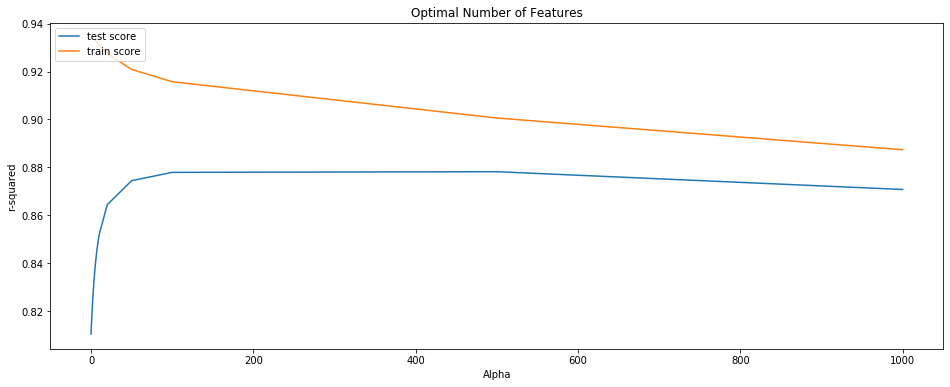

In [57]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('Alpha')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [58]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [59]:
model_cv.best_estimator_.coef_

array([-0.01005288,  0.00602029,  0.0101216 ,  0.05399851,  0.02757833,
       -0.02330852, -0.01877255,  0.01516962,  0.01762849,  0.03153752,
        0.02011751,  0.04035491,  0.01870718,  0.02670505,  0.01529853,
       -0.00704979,  0.02776866,  0.0138171 ,  0.0249083 ,  0.01691397,
        0.01256307,  0.0132057 ,  0.02036465,  0.01702644,  0.01485783,
        0.02248629,  0.0188227 ,  0.0089262 ,  0.00578326,  0.01596938,
        0.00923698,  0.00416701,  0.01933771, -0.00766539,  0.01135489,
        0.00845816,  0.01883704, -0.01277658, -0.01321858,  0.01591098,
        0.02115036,  0.011603  ,  0.01547106,  0.0145026 , -0.01626372,
       -0.008932  , -0.00207698,  0.01094045,  0.00531902,  0.00272204,
        0.00158524,  0.00598508,  0.00618924,  0.01365919,  0.01208811,
        0.0041055 ,  0.00302715, -0.00531544,  0.0050013 ,  0.0078011 ,
        0.00247269,  0.01415708,  0.00244371,  0.008572  ,  0.00145151,
        0.00155354,  0.01087233,  0.01573451,  0.00937761,  0.01

In [60]:
#This shows columns with top5 negative as well as positive coefficients
coeffs = pd.DataFrame({'column':X.columns,'coeff':model_cv.best_estimator_.coef_})
coeffs.sort_values('coeff')

,column,coeff
5,YearBuilt,-0.023309
6,YearRemodAdd,-0.018773
44,Condition2_PosN,-0.016264
38,Neighborhood_MeadowV,-0.013219
37,Neighborhood_Edwards,-0.012777
...,...,...
4,OverallCond,0.027578
16,TotRmsAbvGrd,0.027769
9,1stFlrSF,0.031538
11,GrLivArea,0.040355


As we see from coefficient values, top-5 predictor variables for Ridge regression are:
<br>OverallQual, GrLivArea, 1stFlrSF, TotRmsAbvGrd, OverallCond

In [61]:
cv_results[cv_results.rank_test_score==1][['mean_test_score','mean_train_score','rank_test_score','param_alpha']]

,mean_test_score,mean_train_score,rank_test_score,param_alpha
26,0.878172,0.900587,1,500


Since there is not much differenc in mean train/test score, model is generalisable and <b>not</b> overfitting.

We have got <b>alpha=500</b> for Ridge Linear Regression Model, let's now try Lasso

### Lasso

In [62]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X,y)

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 1500, 2000]}

model_cv = GridSearchCV(estimator=lm,
                       param_grid = params,
                       scoring = 'r2',
                       cv = 5,
                       verbose=1,
                       return_train_score=True)

model_cv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [63]:
cv_results_l = pd.DataFrame(model_cv.cv_results_)
cv_results_l

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028118,0.011696,0.003124,0.006249,0.0001,{'alpha': 0.0001},0.608134,0.888396,0.872337,0.927033,...,0.814666,0.114394,3,0.930775,0.936859,0.938801,0.931192,0.933227,0.934171,0.003161
1,0.023296,0.007991,0.001197,0.000977,0.001,{'alpha': 0.001},0.743842,0.888718,0.879370,0.921859,...,0.842464,0.068729,2,0.926730,0.932531,0.934420,0.927415,0.931412,0.930502,0.002969
2,0.009373,0.007653,0.000000,0.000000,0.01,{'alpha': 0.01},0.903656,0.864071,0.875818,0.895334,...,0.860129,0.051129,1,0.885564,0.886951,0.889439,0.887849,0.909087,0.891778,0.008746
3,0.006249,0.007654,0.000000,0.000000,0.05,{'alpha': 0.05},0.819968,0.790614,0.802596,0.814139,...,0.796451,0.023069,4,0.799994,0.807154,0.800029,0.802848,0.826224,0.807250,0.009841
4,0.006482,0.007948,0.000199,0.000399,0.1,{'alpha': 0.1},0.702482,0.679988,0.684155,0.714899,...,0.696089,0.012684,5,0.698472,0.694463,0.693427,0.703384,0.717241,0.701397,0.008662
5,0.006255,0.007661,0.000000,0.000000,0.2,{'alpha': 0.2},0.429019,0.391909,0.401758,0.452112,...,0.422748,0.022607,6,0.435093,0.407723,0.415618,0.434024,0.431018,0.424695,0.011005
6,0.000000,0.000000,0.003118,0.006237,0.3,{'alpha': 0.3},0.120985,0.072548,0.092772,0.105088,...,0.100357,0.016610,7,0.124108,0.075826,0.098368,0.108168,0.107670,0.102828,0.015835
7,0.003123,0.006247,0.000000,0.000000,0.4,{'alpha': 0.4},-0.001174,-0.000082,-0.001643,-0.013681,...,-0.003468,0.005132,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.009372,0.007653,0.000000,0.000000,0.5,{'alpha': 0.5},-0.001174,-0.000082,-0.001643,-0.013681,...,-0.003468,0.005132,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.003796,0.001938,0.001563,0.000975,0.6,{'alpha': 0.6},-0.001174,-0.000082,-0.001643,-0.013681,...,-0.003468,0.005132,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


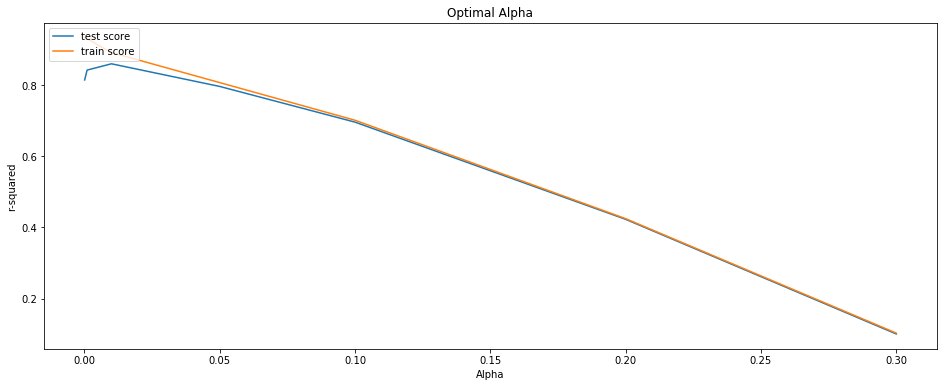

In [64]:
# plotting cv results
plt.figure(figsize=(16,6))

cv_results_l = cv_results_l[cv_results_l.mean_test_score>0]

plt.plot(cv_results_l["param_alpha"], cv_results_l["mean_test_score"])
plt.plot(cv_results_l["param_alpha"], cv_results_l["mean_train_score"])
plt.xlabel('Alpha')
plt.ylabel('r-squared')
plt.title("Optimal Alpha")
plt.legend(['test score', 'train score'], loc='upper left')

In [65]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [66]:
model_cv.best_estimator_.coef_

array([-0.01172658,  0.        ,  0.01081876,  0.10113978,  0.02976254,
       -0.04097423, -0.01386413,  0.01140589,  0.00370157,  0.01399471,
        0.        ,  0.10773651,  0.01929997,  0.00956185,  0.        ,
       -0.        ,  0.00497663,  0.00346103,  0.04539158,  0.0032599 ,
        0.00684061,  0.00755023,  0.02131849,  0.0124082 ,  0.01242985,
        0.01868856,  0.02025697,  0.00402824,  0.        ,  0.01053365,
        0.        ,  0.        ,  0.01140597, -0.01583716,  0.00414973,
        0.00337705,  0.01289182, -0.00726911, -0.00210782,  0.00347366,
        0.01097572,  0.00455822,  0.00507687,  0.00997709, -0.01443956,
       -0.00538511,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.00586223,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.00308151, -0.        ,  0.        ,  0.        ,
        0.        ,  0.0063646 ,  0.00293558,  0.        ,  0.01

In [67]:
#This shows columns with top5 negative as well as positive coefficients
coeffs = pd.DataFrame({'column':X.columns,'coeff':model_cv.best_estimator_.coef_})
coeffs.sort_values('coeff')

,column,coeff
5,YearBuilt,-0.040974
33,MSZoning_RM,-0.015837
44,Condition2_PosN,-0.014440
6,YearRemodAdd,-0.013864
0,MSSubClass,-0.011727
...,...,...
22,BsmtQual_rank,0.021318
4,OverallCond,0.029763
18,GarageCars,0.045392
3,OverallQual,0.101140


As we see from coefficient values, top-5 predictor variables for Ridge regression are:
<br>GrLivArea, OverallQual, GarageCars, YearBuilt, OverallCond

In [68]:
cv_results_l[cv_results_l.rank_test_score==1][['mean_test_score','mean_train_score','rank_test_score','param_alpha']]

,mean_test_score,mean_train_score,rank_test_score,param_alpha
2,0.860129,0.891778,1,0.01


Since there is not much differenc in mean train/test score, model is generalisable and <b>not</b> overfitting.

As we see above, we are getting a little better test score with Ridge (0.878)

Therefore we select <b>Ridge Linear Regression with Alpha=500</b> as our final model

## Model Evaluation

In [69]:
from sklearn.model_selection import cross_val_score
final_model = Ridge(alpha=500)
r2 = cross_val_score(final_model, X, y, scoring='r2', cv=5)
neg_mean_squared_error = cross_val_score(final_model, X, y, scoring='neg_mean_absolute_error', cv = 5)
neg_root_mean_squared_error = cross_val_score(final_model, X, y, scoring='neg_root_mean_squared_error', cv=5)

print('R2 cross-val score')
print(r2.mean())
print('Negative MSE')
print(neg_mean_squared_error.mean())
print('Negative RMSE')
print(neg_root_mean_squared_error.mean())

R2 cross-val score
0.8781718619246274
Negative MSE
-0.08787145948445621
Negative RMSE
-0.13736023771983094


<b>Note: Since the target variable (SalePrice) was log transformed, the results (model predictions) obtained are logarithmic of SalePrice. Therefore the MSE and RMSE values are also logarithmic.</b>

<b>Results</b>
<br>The most important variables of our final model are:
<br>OverallQual(0.054), GrLivArea(0.040), 1stFlrSF(0.032), TotRmsAbvGrd(0.028), OverallCond(0.028)
<br>
<br>In the bracket are quantities of change in SalePrice with unit change in that particular variable, keeping other variables constant.

## Subjective Questions - Assignment Part II

If Alpha is doubled,

In [70]:
lasso = Lasso(alpha=0.02)

lasso.fit(X,y)

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
coeffs = pd.DataFrame({'column':X.columns,'coeff':lasso.coef_})
coeffs.sort_values('coeff')

,column,coeff
5,YearBuilt,-0.028635
33,MSZoning_RM,-0.019754
6,YearRemodAdd,-0.017733
44,Condition2_PosN,-0.004224
0,MSSubClass,-0.001330
...,...,...
22,BsmtQual_rank,0.021518
25,KitchenQual_rank,0.023761
18,GarageCars,0.050627
11,GrLivArea,0.101429


top-5 for lasso on doubling alpha: GrLivArea, OverallQual, GarageCars, YearBuilt, KitchenQual

In [72]:
ridge = Ridge(alpha=1000)

ridge.fit(X,y)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [73]:
coeffs = pd.DataFrame({'column':X.columns,'coeff':ridge.coef_})
coeffs.sort_values('coeff')

,column,coeff
6,YearRemodAdd,-0.020303
5,YearBuilt,-0.020060
44,Condition2_PosN,-0.012070
37,Neighborhood_Edwards,-0.011803
38,Neighborhood_MeadowV,-0.011578
...,...,...
13,FullBath,0.025363
16,TotRmsAbvGrd,0.026365
9,1stFlrSF,0.027668
11,GrLivArea,0.035675


top-5 for ridge on doubling alpha : OverallQual, GrLivArea, 1stFlrSF, TotRmsAbvGrd, FullBath

Builiding Lasso Regression model without top-5 predictors

In [74]:
X_new = X.drop(['GrLivArea', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath'],axis=1)

lr_new = Lasso(alpha=0.01)
lr_new.fit(X_new,y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
coeffs = pd.DataFrame({'column':X_new.columns,'coeff':lr_new.coef_})
coeffs.sort_values('coeff')

,column,coeff
4,YearBuilt,-0.051799
5,YearRemodAdd,-0.028794
33,Neighborhood_MeadowV,-0.011464
28,MSZoning_RM,-0.011293
39,Condition2_PosN,-0.008803
...,...,...
21,FireplaceQu_rank,0.040336
20,KitchenQual_rank,0.044205
13,GarageCars,0.062764
8,2ndFlrSF,0.090923


new Top-5 are : TotalBsmtSF, 2ndFlrSF, GarageCars, YearBuilt, KitchenQual